<h1><center>

![](https://i.imgur.com/jrRGMfx.png)

AI PRACTITIONER COURSE 

ASSIGNMENT - SESSION 18 - Language Model

**&copy; 2020 VTCA-COTAI. Internal Use Only.**

</center></h1>

# 18.1 Coding Practice

## 18.1.1 Chuẩn bị dữ liệu

In [ ]:
!wget https://github.com/MichaelAllen1966/1804_python_healthcare/raw/master/data/drugsComTrain_raw.csv

--2020-12-29 08:42:20--  https://github.com/MichaelAllen1966/1804_python_healthcare/raw/master/data/drugsComTrain_raw.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MichaelAllen1966/1804_python_healthcare/master/data/drugsComTrain_raw.csv [following]
--2020-12-29 08:42:20--  https://raw.githubusercontent.com/MichaelAllen1966/1804_python_healthcare/master/data/drugsComTrain_raw.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82990470 (79M) [text/plain]
Saving to: ‘drugsComTrain_raw.csv.2’

drugsComTrain_raw.c 100%[===================>]  79.15M   278MB/s    in 0.3s    

2020-12-29 08:42:20 (27

In [ ]:
import pandas as pd
df = pd.read_csv('drugsComTrain_raw.csv')
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


Ở bài này, ta sẽ thực hành phân loại bình luận thuốc thành các mốc điểm ``Bad, Neural, Good``

Dataset bao gồm

cột | ý nghĩa
---|---
drugName | Tên thuốc
condition | Triệu chứng bệnh
review | review
rating | chấm điểm thuốc

### TODO [1 Point]
- Kiểm tra shape của dữ liệu
- Kiểm tra bao nhiêu dòng có chứa giá trị Null
- Xóa các dòng có giá trị Null

In [ ]:
# YOUR CODE GOES HERE
#Kiểm tra shape của dữ liệu
df.shape

(161297, 7)

In [ ]:
#Kiểm tra bao nhiêu dòng có chứa giá trị Null
df.isnull().sum()

uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [ ]:
#Xóa các dòng có giá trị Null
df = df.dropna()

In [ ]:
df.isnull().sum()

uniqueID       0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

**Thống kê số lượng từ trong 1 câu review**

Ta tạo thêm cột ``num_word`` chứa số lượng từ trong 1 câu review

In [ ]:
df['num_word'] = df['review'].apply(lambda s : len(s.split()))
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,num_word
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,17
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,141
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,134
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,89
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,124


### TODO [1 Point]
- In ra thống kê của cột ``num_word`` (min, max, mean, std ...)
- In ra 10 dòng của DataFrame mà ở đó cột ``num_word`` có giá trị nhỏ nhất
- In ra số lượng dòng mà ở đó cột ``num_word`` nằm trong khoảng [1, 100]
- In ra số lượng dòng mà ở đó cột ``num_word`` nằm trong khoảng [100, 200]
- In ra số lượng dòng mà ở đó cột ``num_word`` nằm trong khoảng (200, inf)
- Đếm số lượng sample của từng giá trị trong cột ``rating``

In [ ]:
# YOUR CODE GOES HERE
#In ra thống kê của cột num_word (min, max, mean, std ...)
df['num_word'].describe()

count    160398.000000
mean         84.723507
std          45.064077
min           1.000000
25%          48.000000
50%          84.000000
75%         126.000000
max        1894.000000
Name: num_word, dtype: float64

In [ ]:
df_sort = df.sort_values(by = 'num_word',ascending = True)
df_sort.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount,num_word
120576,103488,Loestrin 21 1 / 20,Birth Control,"""Excellent.""",10,4-Nov-08,5,1
155639,23627,Chlorzoxazone,Muscle Spasm,"""useless""",1,24-Mar-17,2,1
128311,20558,Nucynta,Pain,"""ok""",6,20-Aug-16,10,1
62011,11410,Glimepiride,"Diabetes, Type 2","""Good""",10,26-Nov-13,22,1
3090,65194,Mysoline,Seizures,"""Great!""",10,26-Aug-09,21,1
26979,115648,Cefprozil,Tonsillitis/Pharyngitis,"""Great""",9,11-Aug-12,4,1
92421,99217,Doxylamine,Insomnia,"""garbage.""",1,8-Dec-16,4,1
37728,13251,Amphetamine / dextroamphetamine,ADHD,"""works""",9,29-Aug-17,1,1
78057,140720,Escitalopram,Anxiety,"""Positive""",4,16-Aug-16,1,1
10605,158432,Methylphenidate,atigue,"""A+++""",8,14-Jun-15,7,1


In [ ]:
# 96313
values = df_sort.num_word.values.copy()
a = 0
for i in range(len(values)) :
    if values[i] >=1 and values[i] <=100 :
        a+=1
b = 0
for i in range(len(values)) :
    if values[i] >100 and values[i] <=200 :
        b+=1
c = 0
for i in range(len(values)) :
    if values[i] >200:
        c+=1
print(' số lượng dòng mà ở đó cột num_word nằm trong khoảng [1, 100]: ',a)
print(' số lượng dòng mà ở đó cột num_word nằm trong khoảng (100, 200]: ',b)
print(' số lượng dòng mà ở đó cột num_word nằm trong khoảng (200, inf): ',c)
a+b+c == len(values)

 số lượng dòng mà ở đó cột num_word nằm trong khoảng [1, 100]:  96313
 số lượng dòng mà ở đó cột num_word nằm trong khoảng (100, 200]:  63829
 số lượng dòng mà ở đó cột num_word nằm trong khoảng (200, inf):  256


True

In [ ]:
df['rating'].value_counts()

10    50745
9     27379
1     21504
8     18791
7      9395
5      7959
2      6879
3      6465
6      6301
4      4980
Name: rating, dtype: int64

**Clean dữ liệu**


In [ ]:
import re

def clean_text(x):
  pattern = r'[^a-zA-z0-9\s]'
  x = re.sub(pattern, '', x)
  return x

def remove_new_line(x):
  x = x.replace('\n', '')
  x = x.replace('\r', '')
  x = x.replace('\t', '')
  return x

Ta chuyển đổi các từ viết tắt thành từ đầy đủ

In [ ]:
contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", 
                    "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", 
                    "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", 
                    "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", 
                    "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", 
                    "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have",
                    "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not",
                    "mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", 
                    "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", 
                    "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", 
                    "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have",
                    "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", 
                    "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", 
                    "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have",
                    "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
                    "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  
                    "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", 
                    "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", 
                    "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", 
                    "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are",
                    "y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", 
                    "you've": "you have"}

def replace_contraction(text, contraction_dict):
  contraction_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))
  def replace(match):
    return contraction_dict[match.group(0)]
  return contraction_re.sub(replace, text)

# Test replace_contraction function
replace_contraction("this's a text with contraction", contraction_dict)

'this is a text with contraction'

In [ ]:
# lower the text
df["review"] = df["review"].apply(lambda x: x.lower())

# remove \r \n \t
df["review"] = df["review"].apply(lambda x: remove_new_line(x))

# Clean the text
df["review"] = df["review"].apply(lambda x: clean_text(x))

# Clean Contractions
df["review"] = df["review"].apply(lambda x: replace_contraction(x, contraction_dict))

**Chia dữ liệu thành tập Train và Test**

### TODO [1 Point]
- Chia dữ liệu thành 2 tập Train và Test
  - shuffle=True
  - random_state=42
  - stratify
  - test_size=0.2

In [ ]:
# YOUR CODE GOES HERE
from sklearn.model_selection import train_test_split as tts

X_train,X_test,y_train,y_test = tts(df['review'],df['rating'],test_size = 0.2,stratify =df['rating'], random_state = 42, shuffle =True )
print('Shape of X_train',X_train.shape)
print('Shape of y_train',y_train.shape)
print('Shape of X_test',X_test.shape)
print('Shape of y_test',y_test.shape)

Shape of X_train (128318,)
Shape of y_train (128318,)
Shape of X_test (32080,)
Shape of y_test (32080,)


**Tokenize và padding**

In [ ]:
all_word = []
for seq in X_train:
  all_word.extend(seq.split())
print(all_word[1])

take


In [ ]:
from collections import Counter
import pandas as pd
def count_unique_word(all_word):
    ct = Counter(all_word)
    appen_1 = []
    appen_2 = []
    for i in ct.keys():
        appen_1.append(i)
    for j in ct.values():
        appen_2.append(j)
    data = {"word":appen_1 , "count":appen_2}
    dfword = pd.DataFrame(data)
    dfword = dfword.sort_values(by='count', ascending=False)
    dfword = dfword.reset_index()[["word","count"]]
    return dfword

df_a = count_unique_word(all_word)
df_a.head(50)

,word,count
0,i,587831
1,and,342269
2,the,322734
3,to,257130
4,my,231773
5,a,229176
6,it,226936
7,for,160545
8,was,140136
9,have,136901


In [ ]:
vocab_size = 40000
vector_dims = 100
seq_max_length = 150

# YOUR CODE GOES HERE
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

token = Tokenizer(num_words = vocab_size, oov_token = '<unk>')
token.fit_on_texts(X_train)

In [ ]:
token.word_index

{'<unk>': 1,
 'i': 2,
 'and': 3,
 'the': 4,
 'to': 5,
 'my': 6,
 'a': 7,
 'it': 8,
 'for': 9,
 'was': 10,
 'have': 11,
 'of': 12,
 'on': 13,
 'this': 14,
 'in': 15,
 'but': 16,
 'me': 17,
 'had': 18,
 'is': 19,
 'with': 20,
 'that': 21,
 'not': 22,
 'so': 23,
 'been': 24,
 'at': 25,
 'after': 26,
 'no': 27,
 'am': 28,
 'as': 29,
 'about': 30,
 'day': 31,
 'now': 32,
 'i039m': 33,
 'side': 34,
 'taking': 35,
 'all': 36,
 'has': 37,
 'years': 38,
 'i039ve': 39,
 'first': 40,
 'pain': 41,
 'effects': 42,
 'take': 43,
 'months': 44,
 'only': 45,
 'started': 46,
 'like': 47,
 'get': 48,
 'be': 49,
 'you': 50,
 'up': 51,
 'days': 52,
 'just': 53,
 'very': 54,
 'time': 55,
 'from': 56,
 'or': 57,
 'out': 58,
 'when': 59,
 'feel': 60,
 'if': 61,
 '2': 62,
 'would': 63,
 'because': 64,
 'back': 65,
 'pill': 66,
 'more': 67,
 '3': 68,
 'one': 69,
 'weeks': 70,
 'are': 71,
 'it039s': 72,
 'week': 73,
 'also': 74,
 'took': 75,
 'medication': 76,
 'doctor': 77,
 'got': 78,
 'period': 79,
 'then': 8

### TODO [1 Point]
- Khởi tạo ``Tokenizer`` với ``num_words=40000`` và ``oov_token='<unk>'``
  - Sau đó dùng hàm ``fit_on_texts`` trên X_train
  - Sau đó biến đổi ``X_train`` và ``X_test`` từ chữ thành những con số đại diện cho index của chữ đó trong từ điển
- Dùng ``pad_sequences`` để padding cho X_train và X_test
  - ``maxlen = 150``
  - ``truncating = 'post'``
  - ``padding = 'post'``


In [ ]:
X_train = token.texts_to_sequences(X_train)

In [ ]:
X_test = token.texts_to_sequences(X_test)

In [ ]:
padding_train = pad_sequences(X_train, maxlen = seq_max_length, truncating="post", padding ="post")
padding_test = pad_sequences(X_test, maxlen = seq_max_length, truncating="post", padding ="post")

**Biến đổi label**

### TODO [1 Point]
- Hoàn thành hàm ``transform_label`` bên dưới
  - Hàm này nhận vào ``y`` (lúc này đang có kiểu dữ liệu là Series của pandas)
  - Sau đó chuyển đổi ``y`` thành ``numpy.array``
  - Lặp qua từng giá trị của ``y``
    - Nếu dưới 5 thì chuyển thành 0
    - Nếu từ 5 đến 6 thì chuyển thành 1
    - Nếu từ 7 đến 10 thì chuyển thành 2
  - Áp dụng One-hot Encoding cho y
  - Return y


In [ ]:
from tensorflow.keras.utils import to_categorical
def transform_label(y):
  y = y.values.copy()
  for i in range(len(y)):
      if y[i] < 5 :
          y[i] = 0
      elif y[i] >=5 and y[i]<=7 :
          y[i] = 1
      else :
          y[i] = 2 
  # YOUR CODE GOES HERE

  return to_categorical(y,num_classes =3)

y_train = transform_label(y_train)
y_test = transform_label(y_test)

In [ ]:
y_train

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

## 18.1.2 Xây dựng và huấn luyện mô hình


Cell bên dưới sẽ tải và giải nén pretrained embedding

**Đọc thêm** [GloVe](https://nlp.stanford.edu/projects/glove/)

In [ ]:
!wget https://github.com/allenai/spv2/raw/master/model/glove.6B.100d.txt.gz
!gzip -d glove.6B.100d.txt.gz

--2020-12-29 09:09:53--  https://github.com/allenai/spv2/raw/master/model/glove.6B.100d.txt.gz
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/allenai/spv2/master/model/glove.6B.100d.txt.gz [following]
--2020-12-29 09:09:53--  https://media.githubusercontent.com/media/allenai/spv2/master/model/glove.6B.100d.txt.gz
Resolving media.githubusercontent.com (media.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 134409071 (128M) [application/octet-stream]
Saving to: ‘glove.6B.100d.txt.gz’

glove.6B.100d.txt.g 100%[===================>] 128.18M   264MB/s    in 0.5s    

2020-12-29 09:09:56 (264 MB/s) - ‘glove.6B.100d.txt.gz’ saved [1344

Ta đọc từng dòng trong file vừa giải nén ra, mỗi dòng gồm 2 phần
- Từ (word)
- Vector 100 chiều đại diện cho từ đó

Sau đó ta copy giá trị của các vector mà Từ (word) có xuất hiện trong từ điển đã tạo bên trên

In [ ]:
import numpy as np
embeddings_index = {}
f = open( 'glove.6B.100d.txt')
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

embedding_matrix = np.zeros((vocab_size, vector_dims))
for word, i in token.word_index.items():
  if i >= vocab_size:
    break
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    # words not found in embedding_index will be all-zeros.
    embedding_matrix[i] = embedding_vector

Ta được ``embedding_matrix`` là 1 ma trận có ``shape=(40000, 100)`` tương ứng với 40000 từ trong từ điển của mình, mỗi từ được biểu diễn bằng 1 vector có ``shape=(100)``

Cuối cùng ta khởi tạo model Deep Learning với layer ``Embedding`` nhận vào pretrained-weights đã lấy bên trên. Do dùng pretrained-weights, nên ta sẽ không cập nhật weights cho layer Embedding nữa (``trainable=False``)

### TODO [3 Point]

**Đọc thêm** [Bidirectional LSTM](https://machinelearningmastery.com/develop-bidirectional-lstm-sequence-classification-python-keras/)
- Add thêm layer vào ``model``
  - 1 layer ``Bidirectional LSTM``
  - 1 layer Dense 
  - Output layer
- Compile và train mô hình với 5 epochs, ``validation_split=0.2``
- Vẽ learning curve

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.random import set_seed
from tensorflow.keras.backend import clear_session
clear_session()
np.random.seed(42)
set_seed(42)

embedding_layer = Embedding(vocab_size, vector_dims, weights=[embedding_matrix], trainable=False, input_length=seq_max_length)
model = Sequential()
model.add(embedding_layer)
# YOUR CODE GOES HERE
model.add(Bidirectional(LSTM(300)))
model.add(Dense(300,activation = 'relu'))
model.add(Dense(3,activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = 'accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 150, 100)          4000000   
_________________________________________________________________
bidirectional (Bidirectional (None, 600)               962400    
_________________________________________________________________
dense (Dense)                (None, 300)               180300    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 903       
Total params: 5,143,603
Trainable params: 1,143,603
Non-trainable params: 4,000,000
_________________________________________________________________


In [ ]:
history = model.fit(padding_train,y_train,epochs= 5, verbose = 1,validation_split=0.2)

Epoch 1/5
3208/3208 [==============================] - 88s 28ms/step - loss: 0.7550 - accuracy: 0.6889 - val_loss: 0.6553 - val_accuracy: 0.7258
Epoch 2/5
3208/3208 [==============================] - 87s 27ms/step - loss: 0.5997 - accuracy: 0.7569 - val_loss: 0.5792 - val_accuracy: 0.7657
Epoch 3/5
3208/3208 [==============================] - 87s 27ms/step - loss: 0.5289 - accuracy: 0.7848 - val_loss: 0.5422 - val_accuracy: 0.7823
Epoch 4/5
3208/3208 [==============================] - 87s 27ms/step - loss: 0.4709 - accuracy: 0.8102 - val_loss: 0.5346 - val_accuracy: 0.7878
Epoch 5/5
3208/3208 [==============================] - 87s 27ms/step - loss: 0.4006 - accuracy: 0.8394 - val_loss: 0.5412 - val_accuracy: 0.7997


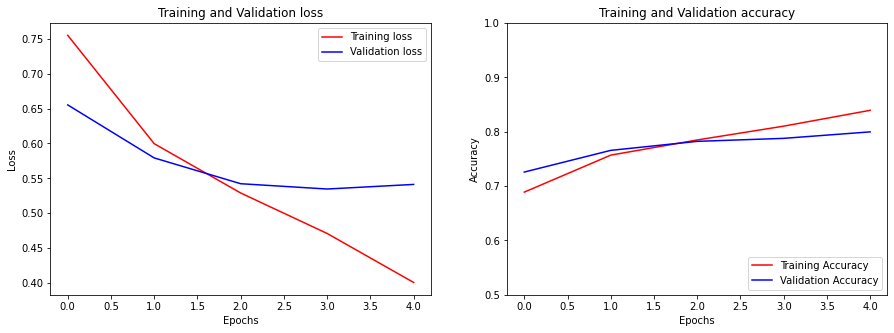

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'r', label='Training loss')
plt.plot(history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'r', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()